In [1]:
#Importación de Librerias 

# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

Análisis exploratorio de datos

In [2]:
#Ingesta de Datos
df = pd.read_csv('./ML_cars.csv', encoding='utf-8', decimal='.')
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Análisis inicial al dataset para ver su composición.
df.info()
print("----"*15)
print(f"Datos Duplicados: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#Exploración de datos estadísticos: 
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Verificar que no haya valores nulos
valores_nulos = df.isnull().sum()
print(valores_nulos)


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
# Diferenciar variables cuantitativas 
num_cols = df.select_dtypes(include=['number']).columns

print ("Las variables númericas son: ", (num_cols.values))

num_cols = num_cols.drop(["car_ID",'symboling'])

print ("Las variables númericas son: ", (num_cols.values))

Las variables númericas son:  ['car_ID' 'symboling' 'wheelbase' 'carlength' 'carwidth' 'carheight'
 'curbweight' 'enginesize' 'boreratio' 'stroke' 'compressionratio'
 'horsepower' 'peakrpm' 'citympg' 'highwaympg' 'price']
Las variables númericas son:  ['wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight' 'enginesize'
 'boreratio' 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg'
 'highwaympg' 'price']


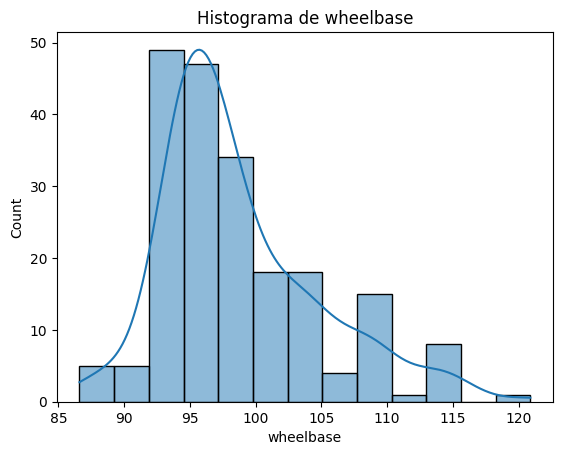

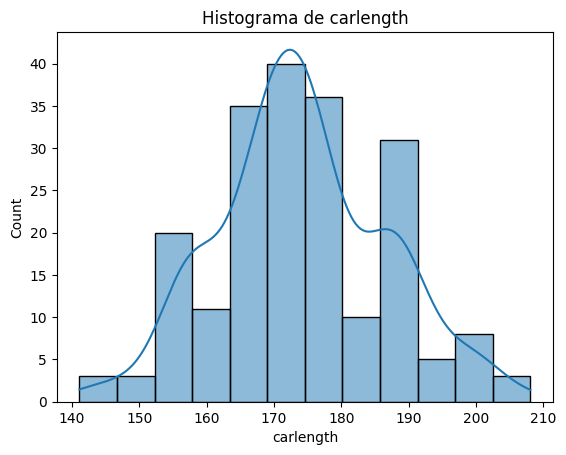

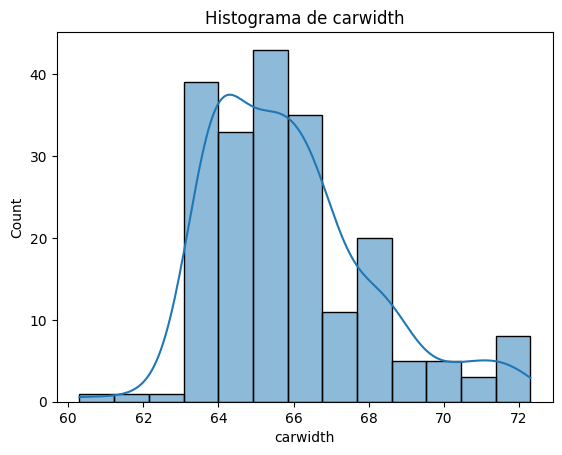

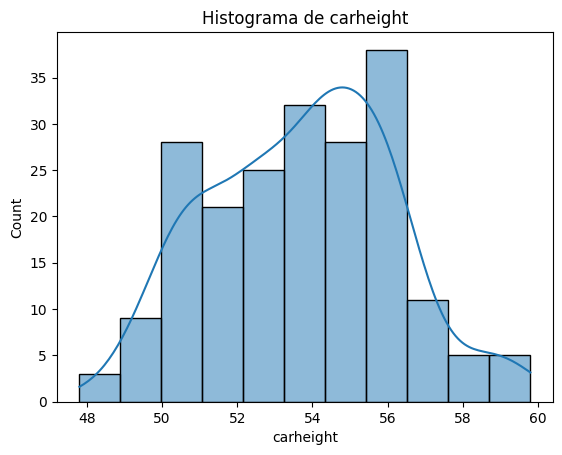

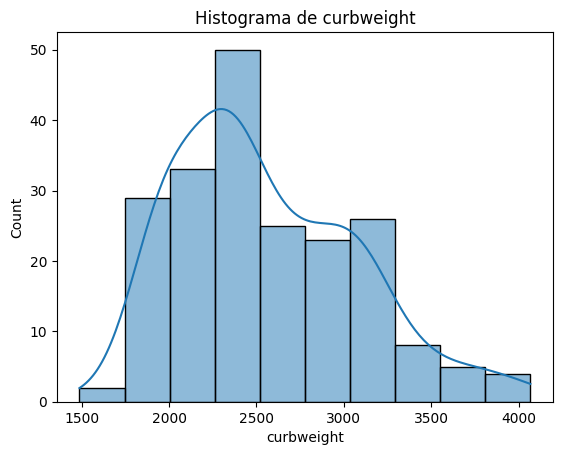

KeyboardInterrupt: 

In [7]:
# Histogramas para las variables numéricas para identificar posibles valores atípicos
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

# Dibuja un boxplot para identificar datos atípicos
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Observando las principales metricas estadisticas y los boxplots se descarta la existencia de valores atipicos en las variables numericas. 

In [8]:
# 1. Identificar las variables categóricas
variables_categoricas = df.select_dtypes(include=['object']).columns

print (variables_categoricas)

#Elimino las que no ineresan
variables_categoricas = variables_categoricas.drop(["CarName",'drivewheel','enginelocation'])

print (variables_categoricas)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')


In [9]:
# Itero a través de estas columnas y muestro los valores únicos:
for columna in variables_categoricas:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en la columna '{columna}': {valores_unicos}")


Valores únicos en la columna 'fueltype': ['gas' 'diesel']
Valores únicos en la columna 'aspiration': ['std' 'turbo']
Valores únicos en la columna 'doornumber': ['two' 'four']
Valores únicos en la columna 'carbody': ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Valores únicos en la columna 'enginetype': ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Valores únicos en la columna 'cylindernumber': ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Valores únicos en la columna 'fuelsystem': ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


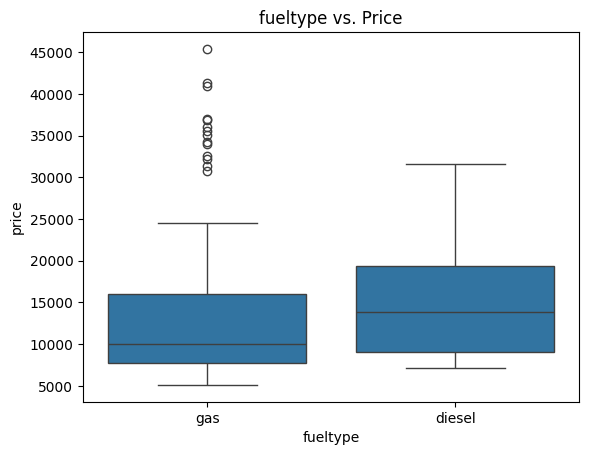

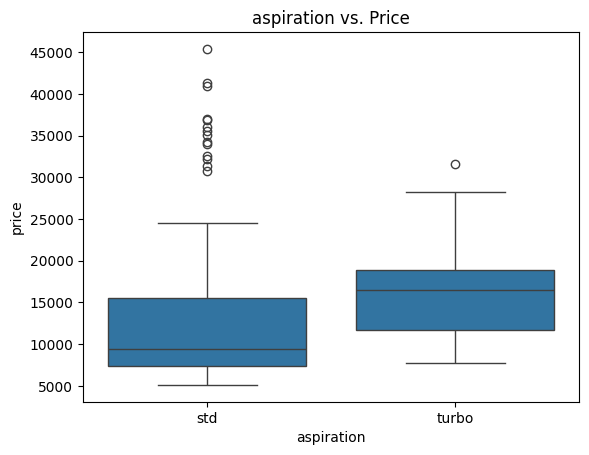

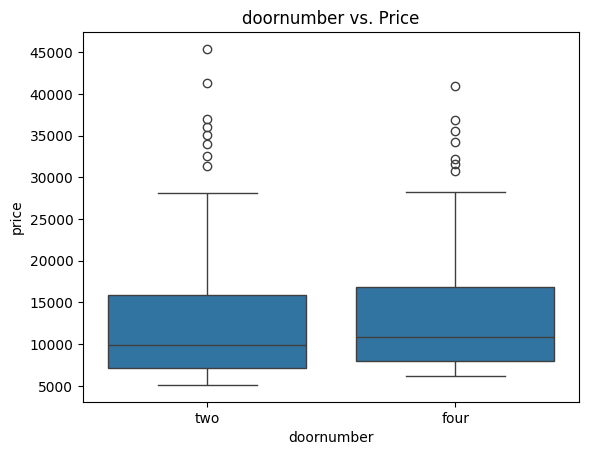

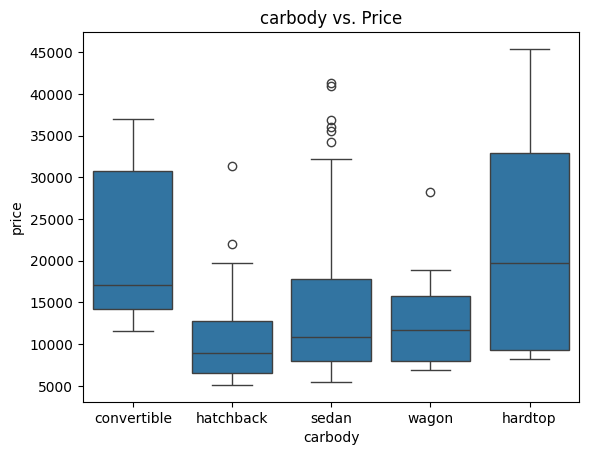

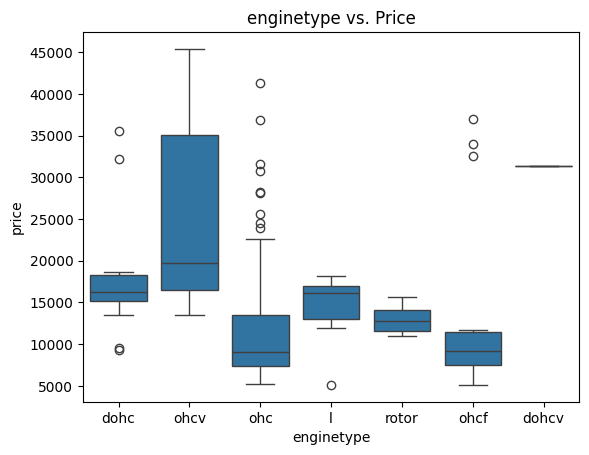

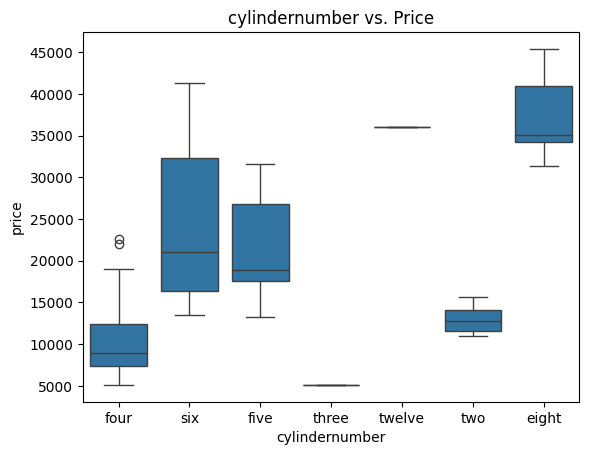

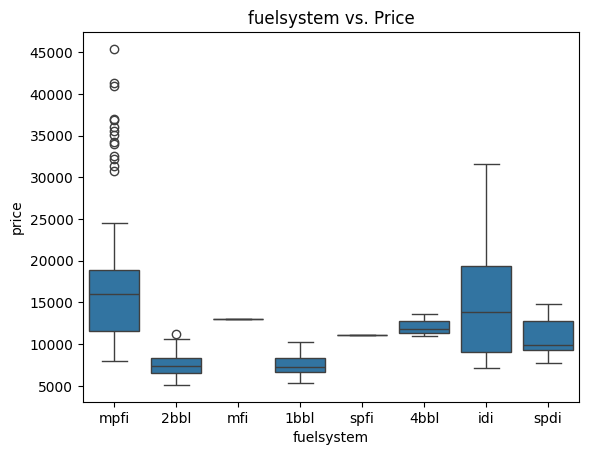

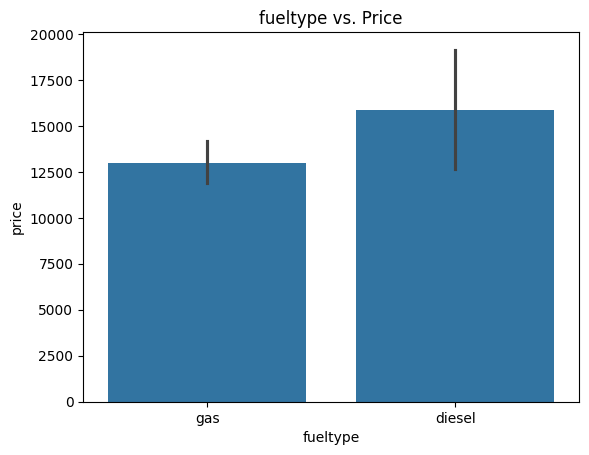

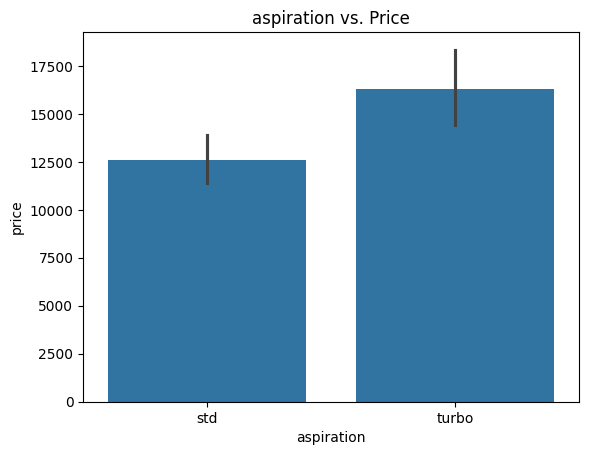

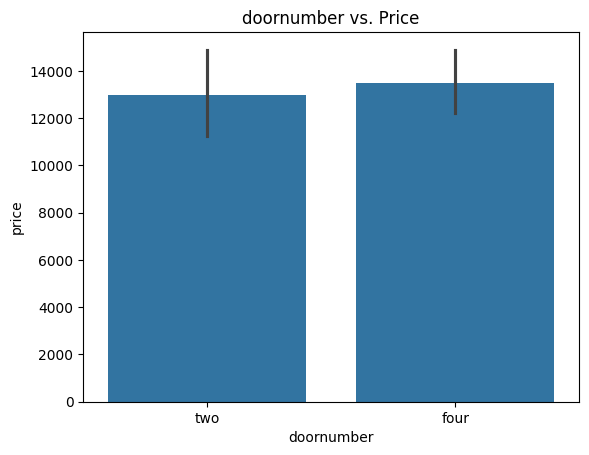

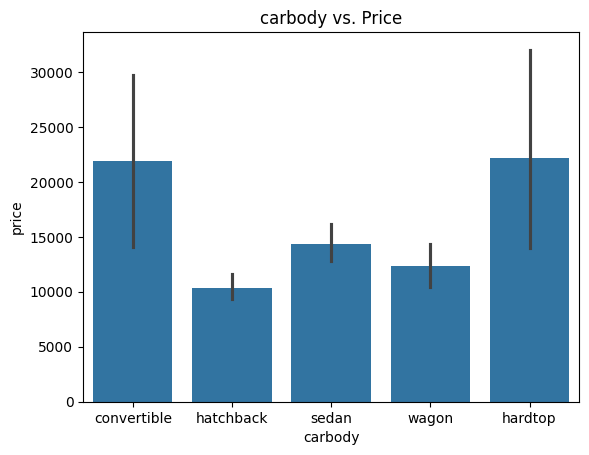

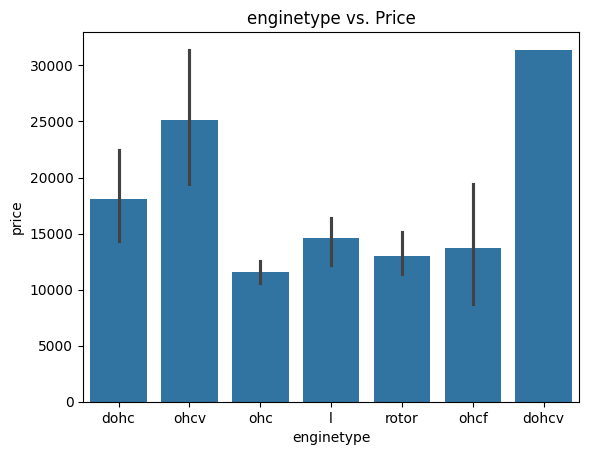

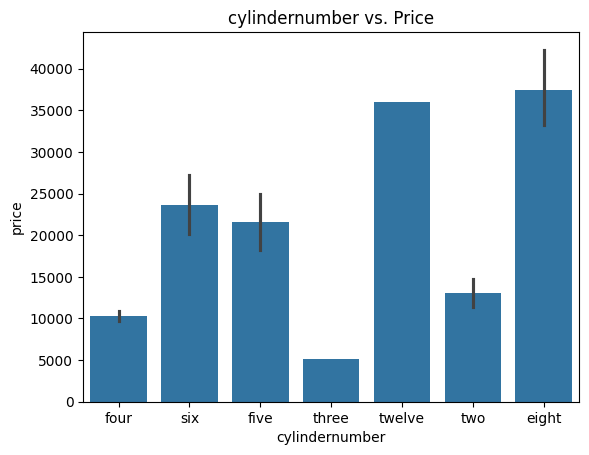

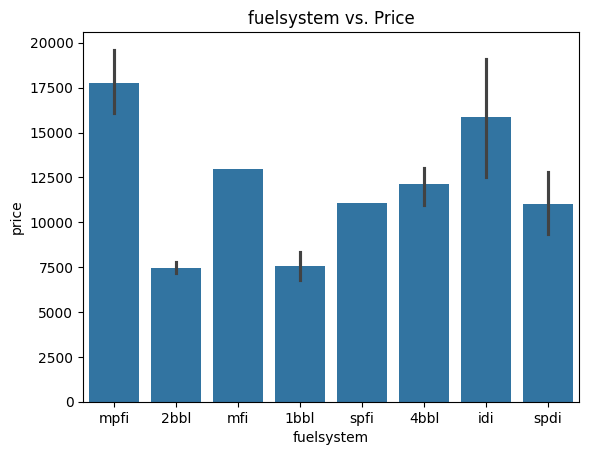

In [10]:
#Analizo las variables categoricas para ver cuáles voy a convertir a dummies
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja
for categoria in variables_categoricas:
    sns.boxplot(x=categoria, y='price', data=df)
    plt.title(f'{categoria} vs. Price')
    plt.show()

# Gráfico de barras
for categoria in variables_categoricas:
    sns.barplot(x=categoria, y='price', data=df)
    plt.title(f'{categoria} vs. Price')
    plt.show()


In [11]:
categorias = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

for categoria in categorias:
    resumen = df.groupby(categoria)['price'].agg(['mean', 'median', 'std'])
    print(f"Resumen de '{categoria}':\n{resumen}\n")

Resumen de 'fueltype':
                mean   median          std
fueltype                                  
diesel    15838.1500  13852.5  7759.843713
gas       12999.7982   9989.0  7984.409306

Resumen de 'aspiration':
                    mean   median          std
aspiration                                    
std         12611.270833   9418.0  8214.342183
turbo       16298.166676  16503.0  6098.889385

Resumen de 'doornumber':
                    mean   median          std
doornumber                                    
four        13501.152174  10898.0  7338.296321
two         12989.924078   9927.0  8784.227805

Resumen de 'carbody':
                     mean   median           std
carbody                                         
convertible  21890.500000  17084.5  11187.802193
hardtop      22208.500000  19687.5  14555.520749
hatchback    10376.652386   8897.0   4909.641988
sedan        14344.270833  10846.5   8470.487812
wagon        12371.960000  11694.0   5120.948695

Resumen de

In [12]:
# Me quedo con carbody y fueltype
# Las convierto en variables dummies
#  Usar OneHotEncoder para convertir las variables categóricas a dummies
from sklearn.preprocessing import OneHotEncoder
#Carbody
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(df[["carbody"]])

# Utiliza la función get_dummies de Pandas para convertir la columna "carbody" en variables dummy
df = pd.get_dummies(df, columns=["carbody"])

In [13]:
#Fueltype
one_hot_encoder = OneHotEncoder(drop='first')
one_hot_encoder.fit(df[["fueltype"]])

# Utiliza la función get_dummies de Pandas para convertir la columna "carbody" en variables dummy
df = pd.get_dummies(df, columns=["fueltype"])

In [14]:
df.head()

,car_ID,symboling,CarName,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,std,two,rwd,front,88.6,168.8,64.1,...,21,27,13495.0,True,False,False,False,False,False,True
1,2,3,alfa-romero stelvio,std,two,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,True,False,False,False,False,False,True
2,3,1,alfa-romero Quadrifoglio,std,two,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,False,False,True,False,False,False,True
3,4,2,audi 100 ls,std,four,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,False,False,False,True,False,False,True
4,5,2,audi 100ls,std,four,4wd,front,99.4,176.6,66.4,...,18,22,17450.0,False,False,False,True,False,False,True


In [15]:
# 4. Calcular la matriz de correlación entre las variables numéricas
matriz_correlacion = df[num_cols].corr()

# Visualizar la matriz de correlación
print(matriz_correlacion)

                  wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.874587  0.795144   0.589435    0.776386   
carlength          0.874587   1.000000  0.841118   0.491029    0.877728   
carwidth           0.795144   0.841118  1.000000   0.279210    0.867032   
carheight          0.589435   0.491029  0.279210   1.000000    0.295572   
curbweight         0.776386   0.877728  0.867032   0.295572    1.000000   
enginesize         0.569329   0.683360  0.735433   0.067149    0.850594   
boreratio          0.488750   0.606454  0.559150   0.171071    0.648480   
stroke             0.160959   0.129533  0.182942  -0.055307    0.168790   
compressionratio   0.249786   0.158414  0.181129   0.261214    0.151362   
horsepower         0.353294   0.552623  0.640732  -0.108802    0.750739   
peakrpm           -0.360469  -0.287242 -0.220012  -0.320411   -0.266243   
citympg           -0.470414  -0.670909 -0.642704  -0.048640   -0.757414   
highwaympg        -0.5440

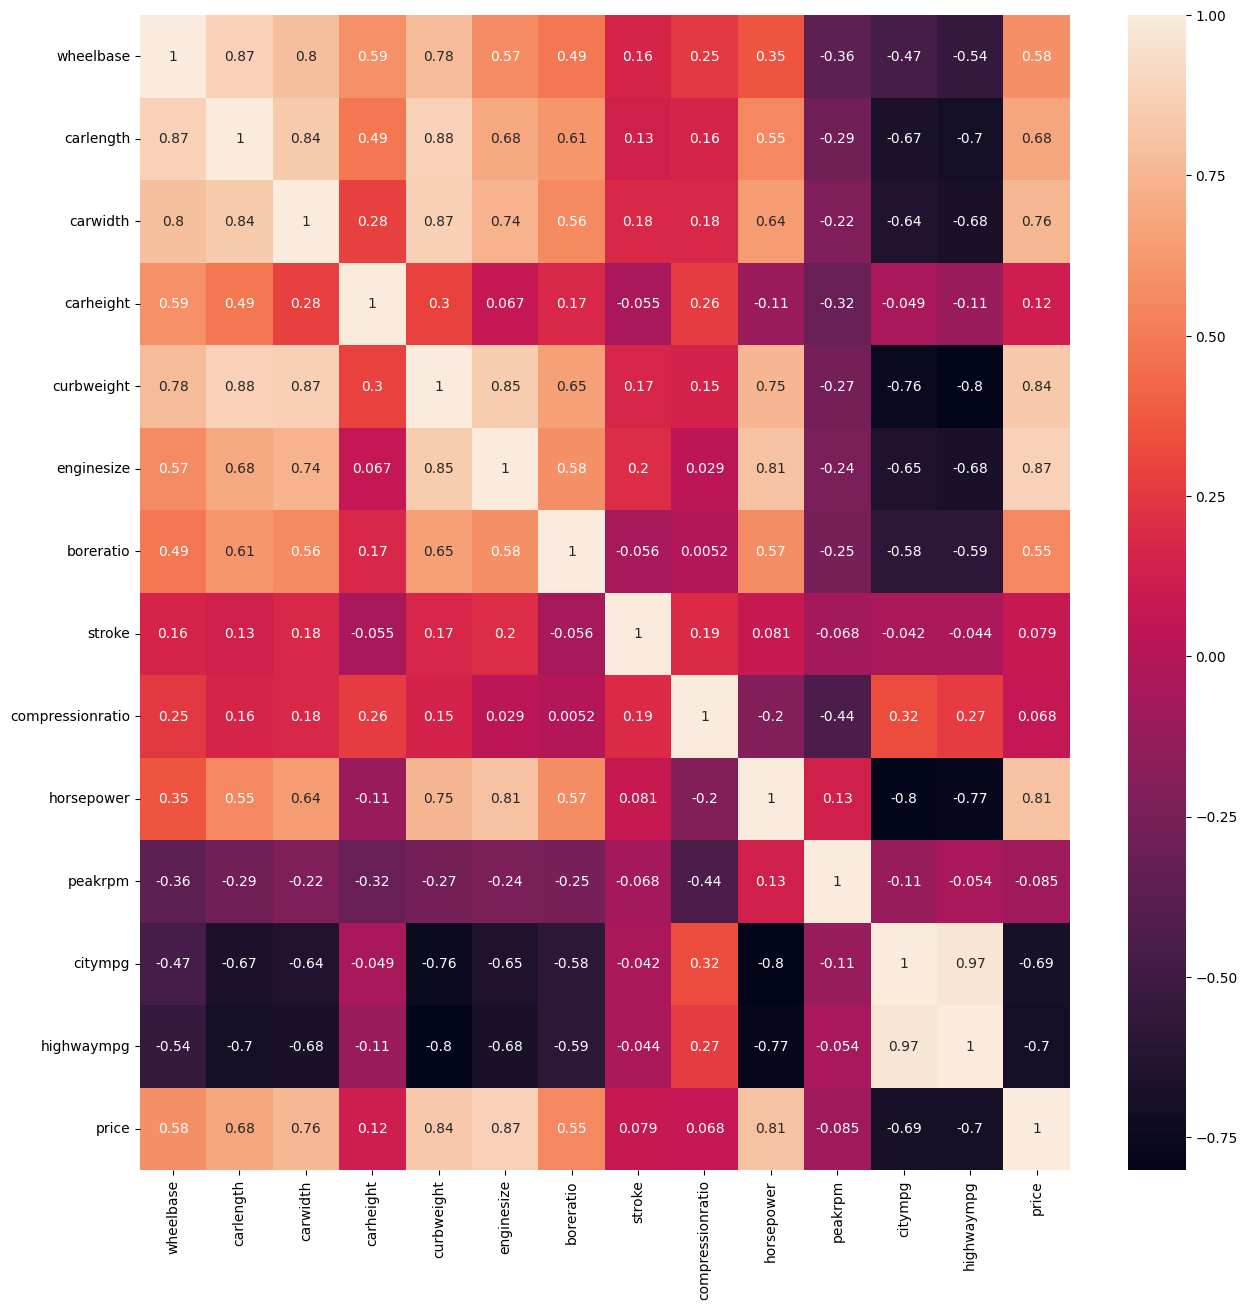

In [16]:
# Análisis de correlación y mapa de calor:
plt.figure(figsize=(15,15))

sns.heatmap(matriz_correlacion, annot=True)
plt.show()

In [32]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon'],
      dtype='object')

In [17]:
#Establezo variables dependientes seleccionando aquellas que resultan relevantes observando la matriz de correlación y el mapa de calor:
#Selecciono "curbweight" como variable representativa de las dimensiones del auto, correlacionada con las demás del mismo tipo. 
#Selecciono highwaympg y descarto citywaympg por estar altamente correlacionadas
#Descarto fueltype_gas y carbody_sedad, asignandolas como categorías base para interpretar los coeficientes asociados a las variables dummies
X= df[['curbweight', 'enginesize',
       'horsepower',
       'citympg','fueltype_diesel',
       'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback',  'carbody_wagon']]
y= df["price"]


In [18]:
X.head()

,curbweight,enginesize,horsepower,citympg,fueltype_diesel,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_wagon
0,2548,130,111,21,False,True,False,False,False
1,2548,130,111,21,False,True,False,False,False
2,2823,152,154,19,False,False,False,True,False
3,2337,109,102,24,False,False,False,False,False
4,2824,136,115,18,False,False,False,False,False


In [19]:
# División de los datos en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#Verifico la cantidad de registros en cada conjunto de Datos
num_registros_x_train = len(X_train)
num_registros_x_test = len(X_test)
num_registros_y_train = len(y_train)
num_registros_y_test = len(y_test)

print(f"Número de registros en x_train: {num_registros_x_train}")
print(f"Número de registros en x_test: {num_registros_x_test}")
print(f"Número de registros en y_train: {num_registros_y_train}")
print(f"Número de registros en y_test: {num_registros_y_test}")


Número de registros en x_train: 143
Número de registros en x_test: 62
Número de registros en y_train: 143
Número de registros en y_test: 62


In [21]:
#Entreno al modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

LinearRegression()

In [23]:
modelo.coef_

array([ 5.74057909e+00,  5.18214266e+01,  3.97877043e+01, -9.85689173e+01,
        7.99874504e+02,  1.69454205e+03,  6.74654240e+03, -1.25828386e+03,
       -3.17202282e+03])

In [24]:
# Identificamos los coeficientes
coeficientes = modelo.coef_
intercepto = modelo.intercept_

print('B0 = {}, B1 ={}, B2 = {}, B3 = {}, B4 = {}, B5 = {}'.format(intercepto,
                                                                   coeficientes[0],coeficientes[1],
                                                                   coeficientes[2],coeficientes[3],
                                                                   coeficientes[4],coeficientes[5],coeficientes[6],
                                                                   coeficientes[7],coeficientes[8]))
len(coeficientes)

B0 = -9229.079644047897, B1 =5.740579091720012, B2 = 51.821426640406656, B3 = 39.78770427306345, B4 = -98.56891733637367, B5 = 799.8745037225825


9

In [25]:
#Ejecutar una sola vez para evitar errores

nombres_variables = ["intercepto"] + list(X.columns)

# Lista de coeficientes correspondientes
coeficientes = [intercepto, coeficientes[0], coeficientes[1], coeficientes[2], coeficientes[3], 
                coeficientes[4],coeficientes[5],coeficientes[6],coeficientes[7],coeficientes[8]]
# Crear un DataFrame
df_coeficientes = pd.DataFrame({'Variable explicativa': nombres_variables, 'Coeficiente': coeficientes}, )

# Imprimir el DataFrame
print(df_coeficientes.to_string(index=False))



Variable explicativa  Coeficiente
          intercepto -9229.079644
          curbweight     5.740579
          enginesize    51.821427
          horsepower    39.787704
             citympg   -98.568917
     fueltype_diesel   799.874504
 carbody_convertible  1694.542048
     carbody_hardtop  6746.542396
   carbody_hatchback -1258.283861
       carbody_wagon -3172.022820


In [26]:
from sklearn.metrics import mean_squared_error
# Evaluamos el desempeño del conjuto Train
R2 = modelo.score(X_train,y_train)
y_train_predict = modelo.predict(X_train)
RMSE = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("coeficiente de determinación R^2: ", R2)
print('Rmse ',RMSE)

coeficiente de determinación R^2:  0.8648017093284053
Rmse  2870.589496673759


In [27]:
# Evaluamos el desempeño del conjunto Test
R2 = modelo.score(X_test,y_test)
y_test_predict = modelo.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("coeficiente de determinación R^2: ", R2)
print('Rmse ',RMSE)

coeficiente de determinación R^2:  0.7119443213919284
Rmse  4467.410737531312


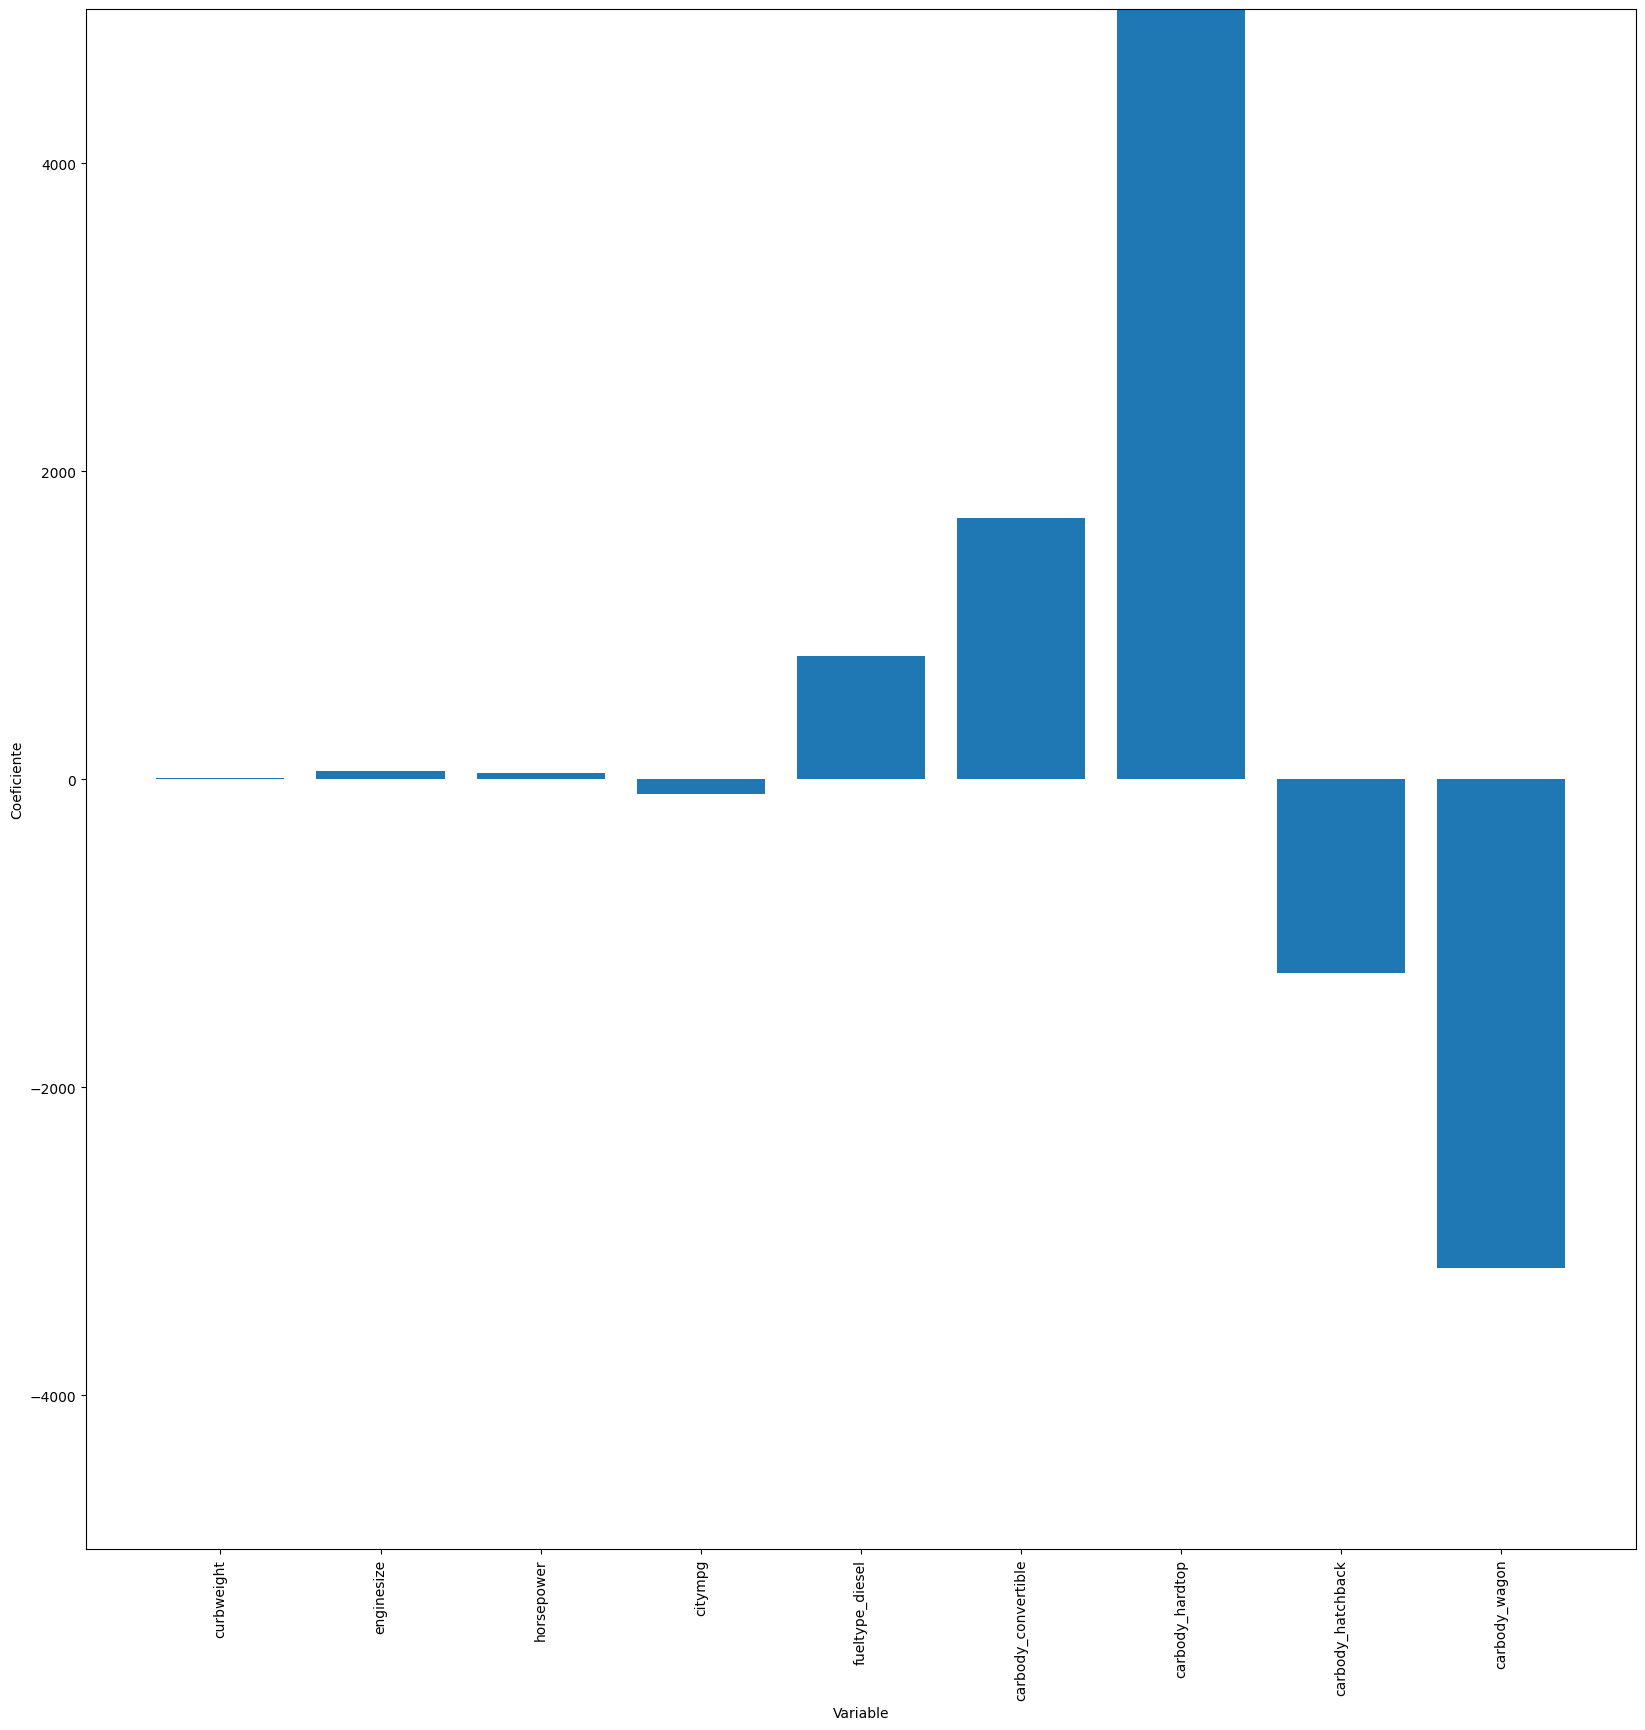

In [28]:
import matplotlib.pyplot as plt

coeficientes = modelo.coef_
nombres_variables = X.columns  
# Tamaño personalizado del gráfico
plt.figure(figsize=(20, 20))  # Ancho x Alto

# Centra el eje vertical en 0
plt.ylim(-5000, 5000)  # Puedes ajustar el rango según tus necesidades

plt.bar(nombres_variables, coeficientes)
plt.xlabel("Variable")
plt.ylabel("Coeficiente")
plt.xticks(rotation=90)
plt.show()


Mediante la matriz de coeficientes y el gráfico de barras concluimos que las caracteristicas mas relevantes para predecir el precio de un auto son "carbody" y "fueltype". 


CLASIFICACIÓN EN "ALTA GAMA" Y "BAJA GAMA"

In [30]:
#Realizo una copia del df original
df2= df

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Calcula la mediana de los precios
mediana_precio = df2['price'].median()


In [32]:
# Clasifica los vehículos en "AltaGama" o "BajaGama" en función de la mediana
df2['clasificacion'] = df2['price'].apply(lambda x: 'Baja Gama' if x <= mediana_precio else 'Alta Gama')
# Elimina la columna de precios


In [ ]:
df2.head(50)

In [35]:
#Evaluo si quedo balanceado el subcojunto objetivo
y_2 = df2['clasificacion']
y_2.value_counts()

clasificacion
Baja Gama    103
Alta Gama    102
Name: count, dtype: int64

In [42]:
# Divido los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_2, test_size=0.3, random_state=42)

# Crea y entrena un modelo de Regresión Logística
modelo2 = LogisticRegression(max_iter=1000)
modelo2.fit(X_train2, y_train2)

# Realiza predicciones en el conjunto de prueba
y_pred2 = modelo2.predict(X_test2)

In [43]:
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test2, y_pred2)

# Calcula la precisión
accuracy = accuracy_score(y_test2, y_pred2)

# Genera un reporte de clasificación con métricas
report = classification_report(y_test2, y_pred2)

Matriz de Confusión:


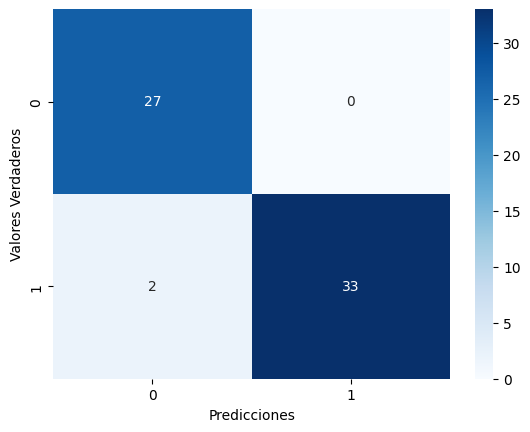

Precisión del modelo: 0.967741935483871


In [44]:
# Imprime la matriz de confusión
print("Matriz de Confusión:")

# Configura el gráfico con seaborn
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Etiquetas de los ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')

# Muestra el gráfico
plt.show()

# Imprime la precisión
print(f'Precisión del modelo: {accuracy}')



HACEMOS UNA PRUEBA CON UN AUTO NUEVO, 
ASIGNANDOLE VALORES CERCANOS A LA MEDIA PARA CADA VARIABLE EXPLICATIVA, 
PARA EVALUAR QUÉ PRECIO PREDICE Y COMO LO CLASIFICA

In [46]:
import warnings

# Suprimir advertencias de sklearn
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


In [47]:
# Características del nuevo auto. Pruebo con un convertible como enginesize de 100
auto_convertible = {
    'curbweight': 2500,  
    'enginesize': 100,  
    'horsepower': 100,  
    'citympg': 25,  
    'fueltype_diesel': 0,  # 1 si es diesel, 0 si es gas
    'carbody_convertible': 1,  # 1 si es convertible, 0 si no
    'carbody_hardtop': 0,  # 1 si es hardtop, 0 si no
    'carbody_hatchback': 0,  # 1 si es hatchback, 0 si no
    'carbody_wagon': 0  # 1 si es wagon, 0 si no
}
#Predicción de precio

precio_predicho = modelo.predict([list(auto_convertible.values())])
print(f'Precio predicho: {precio_predicho[0]}')
# Clasificación Alta Gama o Baja Gama
clasificacion_predicha = modelo2.predict([list(auto_convertible.values())])
print(f'Clasificación predicha: {clasificacion_predicha[0]}')



Precio predicho: 13513.60029079722
Clasificación predicha: Alta Gama


In [48]:
# Características del nuevo auto. Pruebo con un sedan como enginesize de 20
auto_sedan = {
    'curbweight': 2500,  
    'enginesize': 20,  
    'horsepower': 100,  
    'citympg': 25,  
    'fueltype_diesel': 0,  # 1 si es diesel, 0 si es gas
    'carbody_convertible': 0,  # 1 si es convertible, 0 si no
    'carbody_hardtop': 0,  # 1 si es hardtop, 0 si no
    'carbody_hatchback': 0,  # 1 si es hatchback, 0 si no
    'carbody_wagon': 0  # 1 si es wagon, 0 si no
}

#Predicción de precio

precio_predicho = modelo.predict([list(auto_sedan.values())])
print(f'Precio predicho: {precio_predicho[0]}')
# Clasificación Alta Gama o Baja Gama
clasificacion_predicha = modelo2.predict([list(auto_sedan.values())])
print(f'Clasificación predicha: {clasificacion_predicha[0]}')

Precio predicho: 7673.344111957269
Clasificación predicha: Alta Gama
